# Rejection Sampling

In this preliminary code, through *rejection sampling*, I will sample a PDF (the *target distribution*, $\frac{e^{-x^2/2}}{2\pi}$) using differents *proposal distributions*:
- $e^{-|x|}$:
- flat pdf: $f(x)=max(\frac{e^{-x^2/2}}{2\pi})$;
- gaussian approximation.

In [84]:
import numpy as np
import matplotlib.pyplot as plt

- Definition of the *target distribution* and of the *proposal distribution*
- Plot of the target and proposal distributions in a specific range of x values

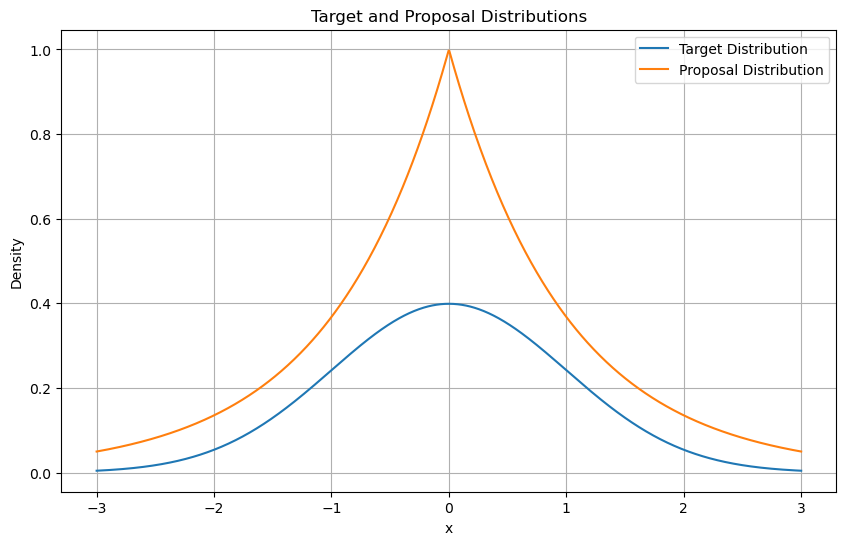

In [85]:
#target distribution (PDF)
def target_distribution(x):
    return np.exp(-x**2/2) / np.sqrt(2*np.pi)

#proposal distribution (PDF)
def proposal_distribution(x):
    return np.exp(-abs(x))

#range of x values
x_values=np.linspace(-3,3,1000)

#plot of the target and proposal distributions
plt.figure(figsize=(10,6))
plt.plot(x_values,target_distribution(x_values),label='Target Distribution')
plt.plot(x_values,proposal_distribution(x_values),label='Proposal Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Target and Proposal Distributions')
plt.legend()
plt.grid(True)
plt.show()

**Rejection algorithm**

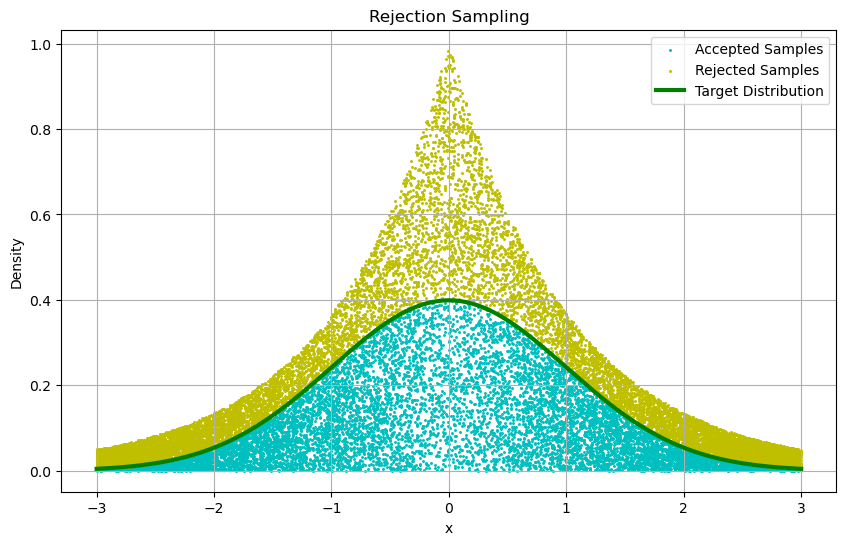

In [86]:
#maximum of the target distribution, used as the upper bound for the proposal distribution
M=max(target_distribution(x_values))

#arrays with accepted values
X=[]
Y=[]
#arrays with rejected values
X_rej=[]
Y_rej=[]
#rejection sampling
def rejection_sampling(n_samples):
    samples=[]
    accepted=0
    while accepted < n_samples:
        x=np.random.uniform(-3,3)  #sample from the proposal distribution
        u=np.random.uniform(0,proposal_distribution(x))  #sample from a uniform distribution for acceptance/rejection
        if u<target_distribution(x):  #acceptance condition
            samples.append(x)
            accepted+=1
            X.append(x)
            Y.append(u)
        else:
            X_rej.append(x)
            Y_rej.append(u)
    return samples

#number of samples to generate
n_samples=10000

#generate samples using rejection sampling
samples=rejection_sampling(n_samples)

#plot of the generated samples along with the target distribution
plt.figure(figsize=(10,6))
plt.scatter(X,Y,marker='.',color='c',s=5,label='Accepted Samples')
plt.scatter(X_rej,Y_rej,marker='.',color='y',s=5,label='Rejected Samples')
plt.plot(x_values,target_distribution(x_values),color='g',linewidth=3,label='Target Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling')
plt.legend()
plt.grid(True)
plt.show()

Test of the *efficiency*, computed as the number of accepted points over the total number of generated points.

In [87]:
efficiency=len(Y)/(len(Y)+len(Y_rej))
print("The efficiency is",efficiency)

The efficiency is 0.4509379509379509


## Flat proposal distribution
Now I will try to do the same thing, but using a *flat distribution* as the proposed one.

In [88]:
'''
#flat PDF
#low: lower boud
#up: upper bound
#n: number of random numbers to generate
def flat_proposal_distribution(low,up,n):
    return np.random.uniform(low,up,size=n)

#plot of the target and proposal distributions
plt.figure(figsize=(10,6))
plt.plot(x_values,target_distribution(x_values),label='Target Distribution')
plt.plot(x_values,flat_proposal_distribution(min(target_distribution(x_values)),M,len(x_values)),label='Proposal Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Target and Proposal Distributions')
plt.legend()
plt.grid(True)
plt.show()
'''

"\n#flat PDF\n#low: lower boud\n#up: upper bound\n#n: number of random numbers to generate\ndef flat_proposal_distribution(low,up,n):\n    return np.random.uniform(low,up,size=n)\n\n#plot of the target and proposal distributions\nplt.figure(figsize=(10,6))\nplt.plot(x_values,target_distribution(x_values),label='Target Distribution')\nplt.plot(x_values,flat_proposal_distribution(min(target_distribution(x_values)),M,len(x_values)),label='Proposal Distribution')\nplt.xlabel('x')\nplt.ylabel('Density')\nplt.title('Target and Proposal Distributions')\nplt.legend()\nplt.grid(True)\nplt.show()\n"

Plot of the target and proposal distributions in a specific range of x values.

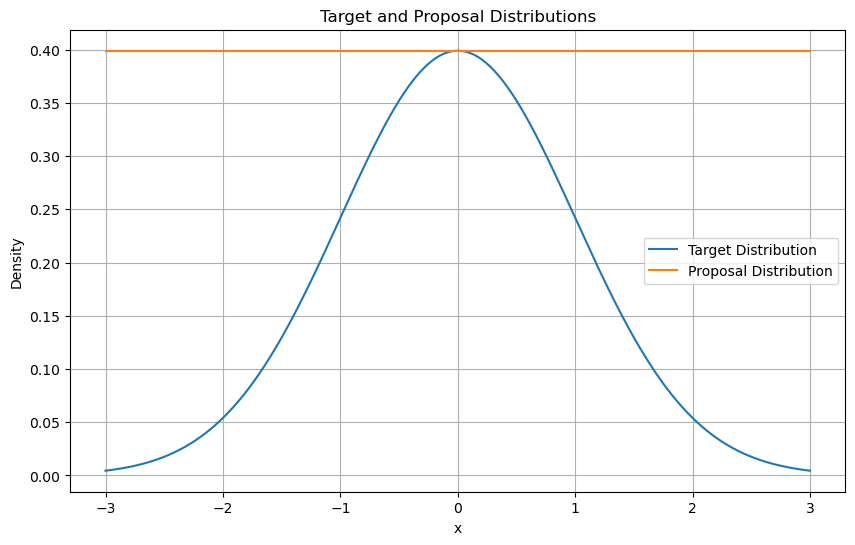

In [89]:
#plot of the target and proposal distributions
plt.figure(figsize=(10,6))
plt.plot(x_values,target_distribution(x_values),label='Target Distribution')
plt.plot(x_values,np.full(1000,M),label='Proposal Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Target and Proposal Distributions')
plt.legend()
plt.grid(True)
plt.show()

**Rejection algorithm**

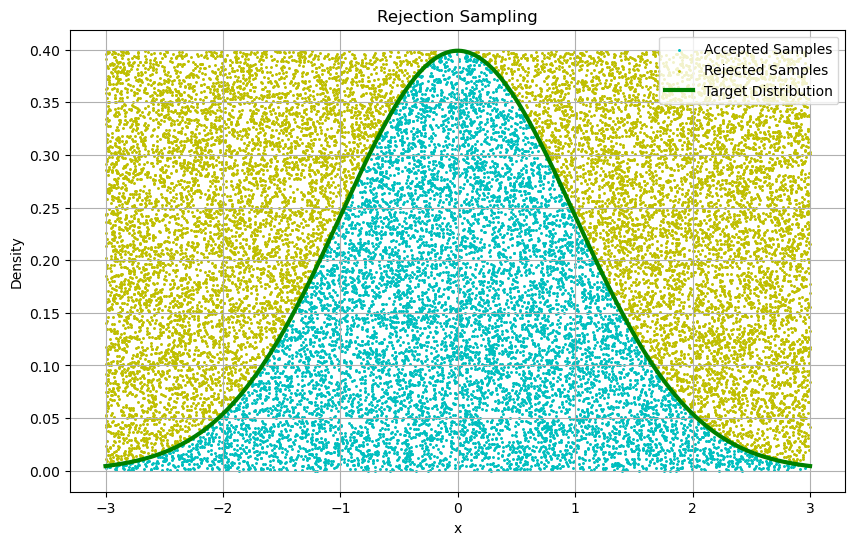

In [90]:
#arrays with accepted values
X_flat=[]
Y_flat=[]
#arrays with rejected values
X_rej_flat=[]
Y_rej_flat=[]
#rejection sampling
def rejection_sampling_flat(n_samples):
    samples_flat=[]
    accepted_flat=0
    while accepted_flat < n_samples:
        x_flat=np.random.uniform(-3,3)  #sample from the proposal distribution
        u_flat=np.random.uniform(0,M)  #sample from a uniform distribution for acceptance/rejection
        if u_flat<target_distribution(x_flat):  #acceptance condition
            samples_flat.append(x_flat)
            accepted_flat+=1
            X_flat.append(x_flat)
            Y_flat.append(u_flat)
        else:
            X_rej_flat.append(x_flat)
            Y_rej_flat.append(u_flat)
    return samples_flat

#generate samples using rejection sampling
samples_flat=rejection_sampling_flat(n_samples)

#plot of the generated samples along with the target distribution
plt.figure(figsize=(10,6))
plt.scatter(X_flat,Y_flat,marker='.',color='c',s=5,label='Accepted Samples')
plt.scatter(X_rej_flat,Y_rej_flat,marker='.',color='y',s=5,label='Rejected Samples')
plt.plot(x_values,target_distribution(x_values),color='g',linewidth=3,label='Target Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling')
plt.legend()
plt.grid(True)
plt.show()

Test of the *efficiency*.

In [91]:
efficiency_flat=len(Y_flat)/(len(Y_flat)+len(Y_rej_flat))
print("The efficiency is",efficiency_flat)

The efficiency is 0.4197095609837992


## Gaussian proposal distribution
In this last part I will use as the proposal distribution the *gaussian approximation* of the target distribution.

In order to obtain the gaussian aproximation of the PDF I have to compute its:
- *mean*;
- *variance*.

In [92]:
from scipy.stats import norm

#new target distribution
def target_distribution_gauss(x):
    return np.exp(-abs(x))

#mean and variance of the target PDF
mu,sigma=np.mean(target_distribution_gauss(x_values)),np.std(target_distribution_gauss(x_values))
#print("mu,sigma",mu,sigma)
mu_estimate = np.mean(samples)
sigma_estimate = np.std(samples)
#print("mu_estimate,sigma_estimate",mu_estimate,sigma_estimate)

#computing mu and sigma using numerical integration
from scipy.integrate import quad

#integrands for mean and variance
def integrand_mean(x):
    return x * target_distribution_gauss(x)

def integrand_variance(x, mu):
    return (x - mu)**2 * target_distribution_gauss(x)

#calculate the mean using numerical integration
mu_num, _ = quad(integrand_mean, -np.inf, np.inf)
#calculate the variance using numerical integration with the obtained mean
sigma_squared, _ = quad(integrand_variance, -np.inf, np.inf, args=(mu,))
#calculate the standard deviation
sigma_num = np.sqrt(sigma_squared)
#print("mu_num,sigma_num",mu_num,sigma_num)

#re-scaling factors
scaling_factor=2.1
scaling_factor_estimate=3.5
scaling_factor_num=3.5
sigma_scaled=3*sigma
sigma_estimate_scaled=0.9*sigma_estimate
sigma_num_scaled=0.6*sigma_num

#gaussian approximation using "norm"
gaussian_approx=scaling_factor*norm.pdf(x_values,loc=mu,scale=sigma_scaled)
gaussian_approx_estimate=scaling_factor_estimate*norm.pdf(x_values,loc=mu_estimate,scale=sigma_estimate_scaled)
gaussian_approx_num=scaling_factor_num*norm.pdf(x_values,loc=mu_num,scale=sigma_num_scaled)

#def gaussian(x, mu, sigma):
    #return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))

I had to introduce scaling factors because the gaussian approximations were not suitable to compute the rejection sampling method. This emphasizes the fact that more precise methods (such as the Metropolis_Hastings algorithm, see exercise 2) are required.

Plot of the target and proposal distributions in a specific range of x values.

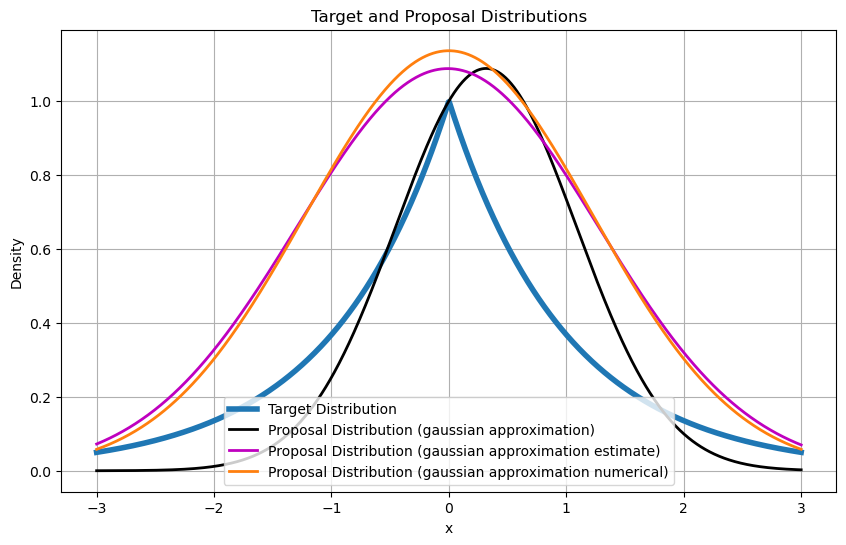

In [93]:
#plot of the target and proposal distributions
plt.figure(figsize=(10,6))
plt.plot(x_values,target_distribution_gauss(x_values),linewidth=4,label='Target Distribution')
#plt.plot(x_values,gaussian(x_values,mu,sigma),linewidth=5,label='Proposal Distribution (gaussian)')
plt.plot(x_values,gaussian_approx,color='k',linewidth=2,label='Proposal Distribution (gaussian approximation)')
plt.plot(x_values,gaussian_approx_estimate,color='m',linewidth=2,label='Proposal Distribution (gaussian approximation estimate)')
plt.plot(x_values,gaussian_approx_num,linewidth=2,label='Proposal Distribution (gaussian approximation numerical)')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Target and Proposal Distributions')
plt.legend()
plt.grid(True)
plt.show()

**Rejection algorithm**

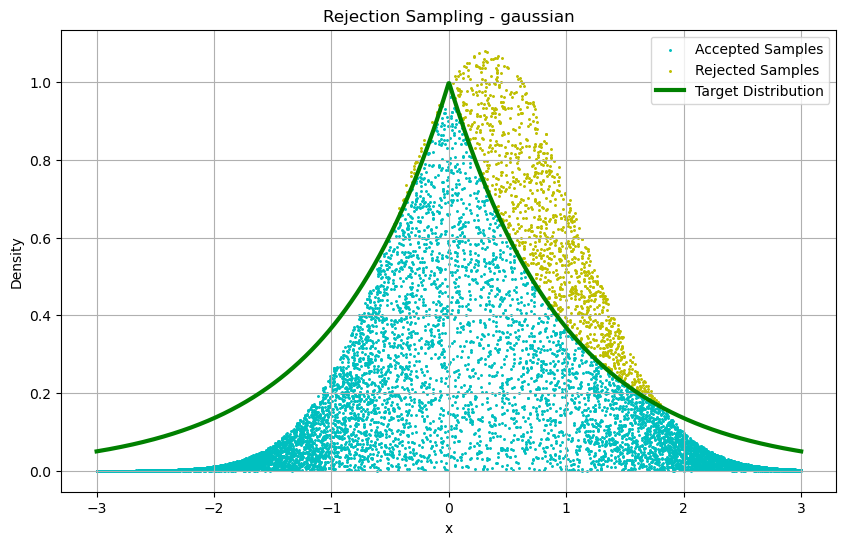

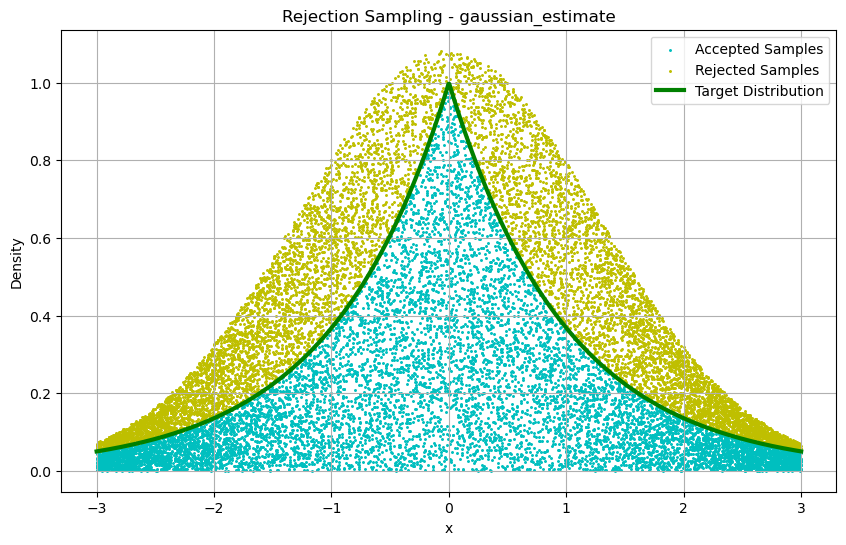

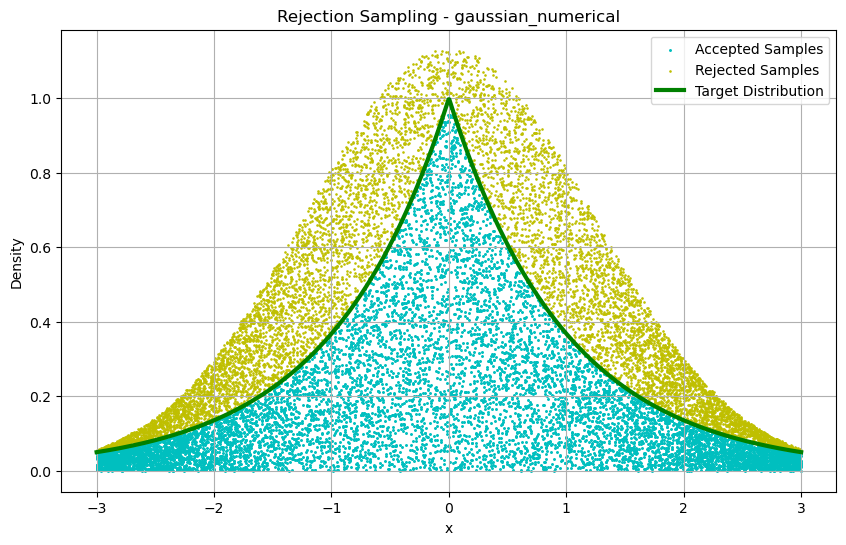

In [94]:
M_gauss=max(target_distribution_gauss(x_values))

#arrays with accepted values
X_gauss=[]
Y_gauss=[]
X_gauss_estimate=[]
Y_gauss_estimate=[]
X_gauss_num=[]
Y_gauss_num=[]
#arrays with rejected values
X_rej_gauss=[]
Y_rej_gauss=[]
X_rej_gauss_estimate=[]
Y_rej_gauss_estimate=[]
X_rej_gauss_num=[]
Y_rej_gauss_num=[]
#rejection sampling
def rejection_sampling_gauss(n_samples):
    samples_gauss=[]
    accepted_gauss=0
    while accepted_gauss < n_samples:
        x_gauss=np.random.uniform(-3,3)
        gaussian_approx_at_x_gauss=scaling_factor*norm.pdf(x_gauss,loc=mu,scale=sigma_scaled)
        u_gauss = np.random.uniform(0, M_gauss*gaussian_approx_at_x_gauss)
        if u_gauss<target_distribution_gauss(x_gauss):  #acceptance condition
            samples_gauss.append(x_gauss)
            accepted_gauss+=1
            X_gauss.append(x_gauss)
            Y_gauss.append(u_gauss)
        else:
            X_rej_gauss.append(x_gauss)
            Y_rej_gauss.append(u_gauss)
    
    samples_gauss_estimate=[]
    accepted_gauss_estimate=0
    while accepted_gauss_estimate < n_samples:
        x_gauss_estimate=np.random.uniform(-3,3)
        gaussian_approx_estimate_at_x_gauss=scaling_factor_estimate*norm.pdf(x_gauss_estimate,loc=mu_estimate,scale=sigma_estimate_scaled)
        u_gauss_estimate = np.random.uniform(0, M_gauss*gaussian_approx_estimate_at_x_gauss)
        if u_gauss_estimate<target_distribution_gauss(x_gauss_estimate):
            samples_gauss_estimate.append(x_gauss_estimate)
            accepted_gauss_estimate+=1
            X_gauss_estimate.append(x_gauss_estimate)
            Y_gauss_estimate.append(u_gauss_estimate)
        else:
            X_rej_gauss_estimate.append(x_gauss_estimate)
            Y_rej_gauss_estimate.append(u_gauss_estimate)

    samples_gauss_num=[]
    accepted_gauss_num=0
    while accepted_gauss_num < n_samples:
        x_gauss_num=np.random.uniform(-3,3)
        gaussian_approx_num_at_x_gauss=scaling_factor_num*norm.pdf(x_gauss_num,loc=mu_num,scale=sigma_num_scaled)
        u_gauss_num = np.random.uniform(0, M_gauss*gaussian_approx_num_at_x_gauss)
        if u_gauss_num<target_distribution_gauss(x_gauss_num):
            samples_gauss_num.append(x_gauss_num)
            accepted_gauss_num+=1
            X_gauss_num.append(x_gauss_num)
            Y_gauss_num.append(u_gauss_num)
        else:
            X_rej_gauss_num.append(x_gauss_num)
            Y_rej_gauss_num.append(u_gauss_num)
    return samples_gauss,samples_gauss_estimate,samples_gauss_num

#generate samples using rejection sampling
samples_gauss,samples_gauss_estimate,samples_gauss_num=rejection_sampling_gauss(n_samples)

#plot of the generated samples along with the target distribution
plt.figure(figsize=(10,6))
plt.scatter(X_gauss,Y_gauss,marker='.',color='c',s=5,label='Accepted Samples')
plt.scatter(X_rej_gauss,Y_rej_gauss,marker='.',color='y',s=5,label='Rejected Samples')
plt.plot(x_values,target_distribution_gauss(x_values),color='g',linewidth=3,label='Target Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling - gaussian')
plt.legend()
plt.grid(True)
plt.show()

#plot of the generated samples along with the target distribution
plt.figure(figsize=(10,6))
plt.scatter(X_gauss_estimate,Y_gauss_estimate,marker='.',color='c',s=5,label='Accepted Samples')
plt.scatter(X_rej_gauss_estimate,Y_rej_gauss_estimate,marker='.',color='y',s=5,label='Rejected Samples')
plt.plot(x_values,target_distribution_gauss(x_values),color='g',linewidth=3,label='Target Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling - gaussian_estimate')
plt.legend()
plt.grid(True)
plt.show()

#plot of the generated samples along with the target distribution
plt.figure(figsize=(10,6))
plt.scatter(X_gauss_num,Y_gauss_num,marker='.',color='c',s=5,label='Accepted Samples')
plt.scatter(X_rej_gauss_num,Y_rej_gauss_num,marker='.',color='y',s=3,label='Rejected Samples')
plt.plot(x_values,target_distribution_gauss(x_values),color='g',linewidth=3,label='Target Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Rejection Sampling - gaussian_numerical')
plt.legend()
plt.grid(True)
plt.show()


Test of the *efficiency*.

In [95]:
efficiency_gauss=len(Y_gauss)/(len(Y_gauss)+len(Y_rej_gauss))
print("The efficiency is",efficiency_gauss)

The efficiency is 0.89086859688196


This last result does not reflect the true efficiency, it simply says that the number of accepted points is higher than that of rejected ones.

In [96]:
efficiency_gauss_estimate=len(Y_gauss_estimate)/(len(Y_gauss_estimate)+len(Y_rej_gauss_estimate))
print("The efficiency is",efficiency_gauss_estimate)

The efficiency is 0.527732334160114


In [97]:
efficiency_gauss_num=len(Y_gauss_num)/(len(Y_gauss_num)+len(Y_rej_gauss_num))
print("The efficiency is",efficiency_gauss_num)

The efficiency is 0.5410377103284099
